In [4]:
# Import kardan-e kütüphane pymysql
import pymysql  # Importing the pymysql library

# Etesal be database
conn = pymysql.connect(host='localhost',  # Establishing connection to the database
                       user='root',       # Username for the database
                       password='mahsaD@93',  # Password for the database
                       database='asset_management')  # Database name

# Sakhtan-e yek cursor baraye ejra kardan-e query ha
cursor = conn.cursor()  # Creating a cursor to execute queries

# Taein kardan-e query baraye ezafe kardan-e data be jadvale `portfolio`
query = '''INSERT INTO portfolio (portfolio_id, portfolio_name, portfolio_manager, asset_class, inseption_date)
           VALUES (%s, %s, %s, %s, %s)'''  # Defining the query to insert data into the `portfolio` table

# Taein kardan-e data-haie ke mikhahim be database ezafe konim
values = [
        ('P15', 'Commodity Fund', 'Sandra Clark', 'multiAsset', '2020-10-06'),  # Data rows to be inserted
        ('P16', 'Global Equities Fund', 'Jane Doe', 'equity', '2020-01-01'),    # into the database
        ('P17', 'Corporate Bond Fund', 'John Smith', 'fixedIncome', '2021-02-01'),  # Each tuple represents a row
        ('P18', 'Balanced Fund', 'Emily Davis', 'multiAsset', '2022-03-01')    # of data
    ]

# Ejra kardan-e query ba estefade az `executemany` baraye ezafe kardan-e chandin satr data be yek bar
cursor.executemany(query, values)  # Executing the query using `executemany` to add multiple rows of data at once



4

In [6]:
# Taein kardan-e data-haye ezafe
additional_values = [
    ('S11', 'B901234', 'US0000011', 'Cloud Storage Innovations', None, None),
    ('S12', 'B012345', 'US0000012', 'Smart Home Technologies', 4.0, '2032-05-01'),
    ('S13', 'B123450', 'US0000013', 'AI Development Lab', None, None),
    ('S14', 'B234560', 'US0000014', 'Space Exploration Inc', 6.0, '2033-07-15'),
    ('S15', 'B345670', 'US0000015', 'Quantum Computing Advancements', None, None)
]  # Defining additional data to be inserted

# Farz kardan ke yek etesal be database ba nam-e 'conn' barqarar shode
try:
    with conn.cursor() as cursor:  # Using the database connection to create a cursor
        # Amade sazi-e query baraye vared kardan-e data
        query = '''INSERT INTO security_master 
        (security_id, sedol, isin, company_name, coupon, maturity_date) 
        VALUES (%s, %s, %s, %s, %s, %s)'''  # Preparing the SQL query for inserting data

        # Ejra kardan-e query ba data-haye ezafe
        cursor.executemany(query, additional_values)  # Executing the query with the additional values

    # Commit kardan-e transaction baraye daem shodan-e taghirat
    conn.commit()  # Committing the transaction to make the changes permanent
    print("Additional data inserted successfully.")  # Chap-e payam-e movafaghiyat dar vared sazi-e data
except pymysql.Error as e:  # Dar sorat-e rokh dadan-e khata
    print(f"An error occurred: {e}")  # Chap-e payam-e khata


An error occurred: (1062, "Duplicate entry 'S11' for key 'security_master.PRIMARY'")


In [28]:
#conn.commit()

In [7]:
import pymysql

# Tansif-e etesal: Etesal be database MySQL ba estefade az etela'at-e dakheli.
conn = pymysql.connect(host='localhost', user='root', password='mahsaD@93', database='asset_management')

try:
    # Sakhtan-e yek cursor baraye ejra kardan-e dastoorat-e SQL.
    cursor = conn.cursor()
    # Taein-e query baraye ezafe kardan-e record-haye jadid be jadval-e `fund_positions`.
    query1 = '''INSERT INTO fund_positions (portfolio_id, security_id, security_name, quantity_held, current_value, date)
                VALUES (%s, %s, %s, %s, %s, %s)'''
    # Data-haie ke mikhahim dar jadval ezafe konim.
    values1 = [
        ('P10', 'S11', 'Innovative Web Services', 1200, 48000.00, '2024-01-11'),
        ('P11', 'S12', 'Advanced Robotics', 250, 12500.00, '2024-01-12'),
        ('P9', 'S13', 'Renewable Energy Solutions', 530, 26500.00, '2024-01-13'),
        ('P12', 'S14', 'Global FinTech Innovations', 1500, 75000.00, '2024-01-14'),
    ]
    
    # Ejra kardan-e query ba estefade az data-haye dade shode va commit kardan baraye tahvil-e taghirat.
    cursor.executemany(query1, values1)
    conn.commit()
    print("Data inserted successfully.")

except pymysql.Error as e:  # Dar sorat-e rokhdad-e khata, chap kardan-e payam-e khata.
    print(f"We have some Issue: {e}")
finally:
    # Bastan-e cursor va etesal baraye rahai-e manabe va peishgiri az nash-e memory leak.
    cursor.close()
    conn.close()


Data inserted successfully.


In [65]:
import pandas as pd

# Barqarar kardan-e yek etesal-e m直t be database ba estefade az pymysql
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='mahsaD@93',
                             database='asset_management')

try:
    # Khandan-e data az jadval-e `fund_performance` va zakhire dar DataFrame
    df_performance = pd.read_sql_query('SELECT * FROM fund_performance', con=connection)
    print("Fund Performance:")
    print(df_performance.head())  # Chap kardan-e avvalin chand satr az DataFrame
    print("\n")

    # Khandan-e data az jadval-e `portfolio` va zakhire dar yek DataFrame digar
    df_portfolio = pd.read_sql_query('SELECT * FROM portfolio', con=connection)
    print("Portfolio:")
    print(df_portfolio.head())  # Chap kardan-e avvalin chand satr az DataFrame
    print("\n")

    # Khandan-e data az jadval-e `security_master` va zakhire sash dar DataFrame
    df_security_master = pd.read_sql_query('SELECT * FROM security_master', con=connection)
    print("Security Master:")
    print(df_security_master.head())  # Chap kardan-e avvalin chand satr az DataFrame
    print("\n")

    # Khandan-e data az jadval-e `fund_positions` va zakhire an dar DataFrame
    df_fund_positions = pd.read_sql_query('SELECT * FROM fund_positions', con=connection)
    print("Fund Positions:")
    print(df_fund_positions.head())  # Chap kardan-e avvalin chand satr az DataFrame
    print("\n")
finally:
    # Ehtemalan-e baste shodan-e etesal ra dar nazar gerefte'im
    connection.close()  # Etesal ra be hame vajh baste'im


Fund Performance:
  performance_id portfolio_id        date  performance
0            FP1           P1  2024-01-31          9.0
1           FP10          P10  2024-10-31          8.0
2           FP11           P1  2024-02-28          9.0
3           FP12           P1  2024-03-31          8.0
4           FP13           P1  2024-04-30          9.0


Portfolio:
  portfolio_id        portfolio_name portfolio_manager  asset_class  \
0           P1  Global Equities Fund          Jane Doe       equity   
1          P10        Commodity Fund      Sandra Clark   multiAsset   
2          P11        Commodity Fund      Sandra Clark   multiAsset   
3          P12  Global Equities Fund          Jane Doe       equity   
4          P13   Corporate Bond Fund        John Smith  fixedIncome   

  inseption_date  
0     2020-01-01  
1     2020-10-01  
2     2020-10-06  
3     2020-01-01  
4     2021-02-01  


Security Master:
  security_id    sedol       isin               company_name  coupon  \
0      

/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_54629/3487800396.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_performance = pd.read_sql_query('SELECT * FROM fund_performance', con=connection)
/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_54629/3487800396.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_portfolio = pd.read_sql_query('SELECT * FROM portfolio', con=connection)
/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_54629/3487800396.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider u

In [75]:
import pandas as pd  # Importing the pandas library for data manipulation
import pymysql  # Importing the pymysql library to work with MySQL databases

# Establishing connection to the MySQL database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='mahsaD@93',
                             database='asset_management')

try:
    # Defining an SQL query. The query selects portfolio ID, date, and performance from the 'fund_performance' table
    # and joins it with the 'portfolio' table to match portfolio IDs. It orders the results by the date.
    sql_query = """
                SELECT p.portfolio_id, fp.date, fp.performance
                FROM fund_performance fp
                JOIN portfolio p ON fp.portfolio_id = p.portfolio_id
                ORDER BY fp.date ;
                """
    
    # Executing the SQL query and fetching the data into a pandas DataFrame
    df_returns = pd.read_sql_query(sql_query, con=connection)
    
    # Displaying the fetched data in the DataFrame format
    print(df_returns)

finally:
    # Closing the database connection to free up resources
    connection.close()


   portfolio_id        date  performance
0            P1  2024-01-31          9.0
1            P1  2024-02-28          9.0
2            P2  2024-02-28          5.0
3            P1  2024-03-31          8.0
4            P2  2024-03-31          5.0
5            P3  2024-03-31          7.0
6            P1  2024-04-30          9.0
7            P2  2024-04-30          5.0
8            P4  2024-04-30          5.0
9            P1  2024-05-31          9.0
10           P2  2024-05-31          6.0
11           P5  2024-05-31          9.0
12           P1  2024-06-30          9.0
13           P2  2024-06-30          5.0
14           P6  2024-06-30          7.0
15           P2  2024-07-31          6.0
16           P7  2024-07-31          4.0
17           P8  2024-08-31          8.0
18           P9  2024-09-30          6.0
19          P10  2024-10-31          8.0


/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_54629/363681162.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_returns = pd.read_sql_query(sql_query, con=connection)


/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping w

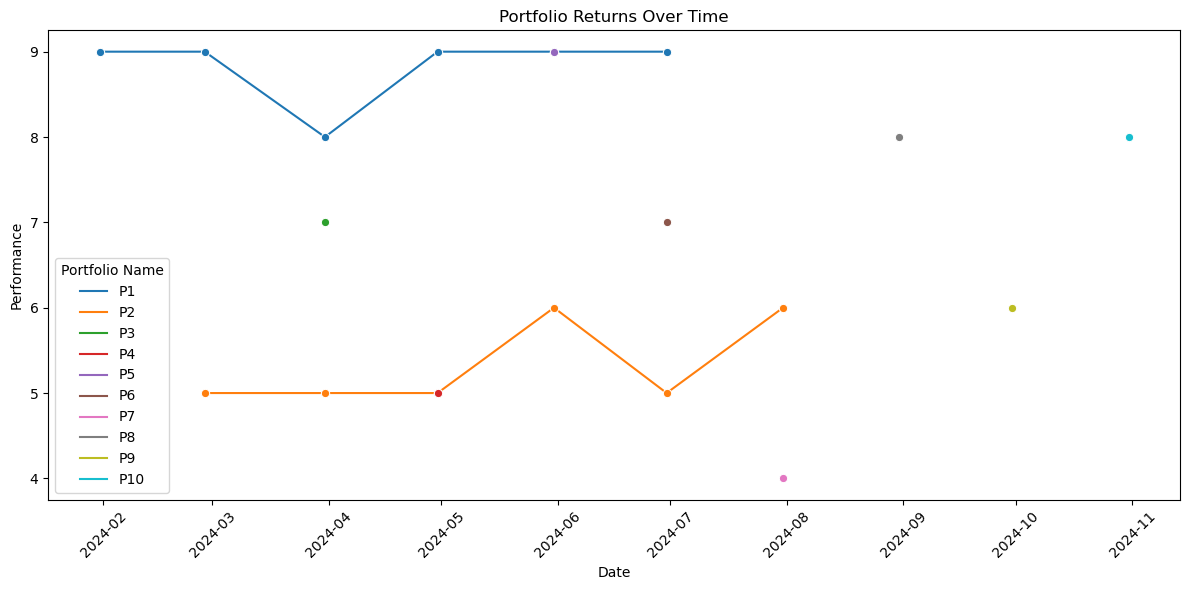

/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/mahsadorri/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping w

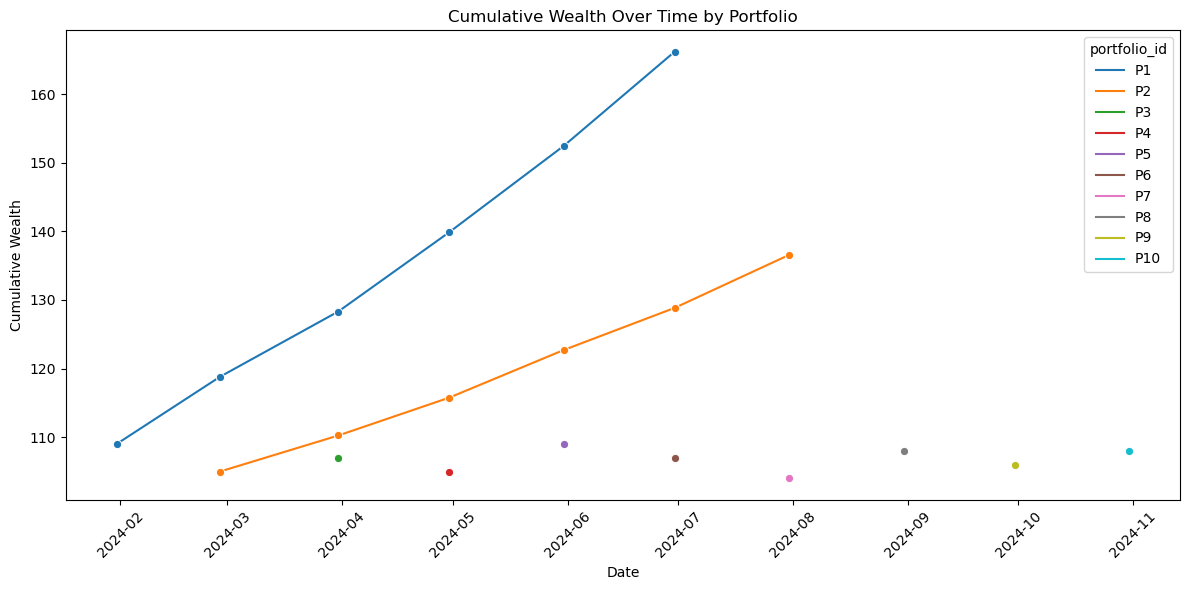

In [76]:
import matplotlib.pyplot as plt  # Import kardan-e matplotlib baraye keshidan-e nemoodar
import seaborn as sns  # Import kardan-e seaborn baraye ziba sazi-e nemoodarha

# Tabdil-e sotun-e 'date' be format-e datetime baraye keshidan-e nemoodar
df_returns['date'] = pd.to_datetime(df_returns['date'])

# Keshidan-e nemoodar
plt.figure(figsize=(12, 6))  # Taein-e andaze-e nemoodar
# Keshidan-e nemoodar-e khati ba estefade az seaborn. har rang neshan dahande-e yek portfolio hast
sns.lineplot(data=df_returns, x='date', y='performance', hue='portfolio_id', marker='o')

plt.title('Portfolio Returns Over Time')  # Gozashtan-e unvan baraye nemoodar
plt.xlabel('Date')  # Gozashtan-e label baraye mehvar-e x
plt.ylabel('Performance')  # Gozashtan-e label baraye mehvar-e y
plt.xticks(rotation=45)  # Charkhesh-e matn-e tick ha baraye khandan-e rahat tar
plt.legend(title='Portfolio Name')  # Afzoodan-e afsoon baraye namayesh-e esm-e portfolioha
plt.tight_layout()  # Tazmin-e inke hame chiz dar frame-e nemoodar ja bejaye
plt.show()  # Namayesh-e nemoodar

import numpy as np  # Import kardan-e numpy baraye kar ba array-ha va amaliyat-e riazi

# Farz kardan-e seporde-ye avvalie be meghdar-e 100 baraye sadegi
starting_wealth = 100

# Tabdil-e darsad-e bazdeh be format-e zarib baraye mohasebat
df_returns['multiplier'] = 1 + (df_returns['performance'] / 100.0)

# Mohasebat-e daramad-e entejami baraye har portfolio
df_returns['cumulative_wealth'] = df_returns.groupby('portfolio_id')['multiplier'].cumprod() * starting_wealth #???????????? 
plt.figure(figsize=(12, 6))  # Taein-e andaze baraye nemoodar-e jadid
# Keshidan-e nemoodar-e daramad-e entejami ba estefade az seaborn
sns.lineplot(data=df_returns, x='date', y='cumulative_wealth', hue='portfolio_id', marker='o')

plt.title('Cumulative Wealth Over Time by Portfolio')  # Gozashtan-e unvan baraye nemoodar
plt.xlabel('Date')  # Label baraye mehvar-e x
plt.ylabel('Cumulative Wealth')  # Label baraye mehvar-e y
plt.xticks(rotation=45)  # Charkhesh-e matn-e tick ha
plt.legend(title='portfolio_id')  # Afzoodan-e afsoon ba esm-e portfolio
plt.tight_layout()  # Tazmin-e chideman-e nemoodar dar frame
plt.show()  # Namayesh-e nemoodar


In [74]:

df_returns['multiplier'] = 1 + (df_returns['performance'] / 100.0)
print(df_returns.loc[df_returns['portfolio_id'] == 'P2'])


   portfolio_id       date  performance  multiplier  cumulative_wealth
7            P2 2024-03-31          5.0        1.05         105.000000
8            P2 2024-04-30          5.0        1.05         110.250000
9            P2 2024-05-31          6.0        1.06         116.865000
10           P2 2024-06-30          5.0        1.05         122.708250
11           P2 2024-02-28          5.0        1.05         128.843663
12           P2 2024-07-31          6.0        1.06         136.574282


df_returns.sort_values(by=['portfolio_id', 'date'], inplace=True)

df_returns['multiplier'] = 1 + (df_returns['performance'] / 100.0)
df_returns['cumulative_wealth'] = df_returns.groupby('portfolio_id')['multiplier'].cumprod() * starting_wealth

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_returns, x='date', y='cumulative_wealth', hue='portfolio_id', marker='o')

plt.title('Cumulative Wealth Over Time by Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Wealth')
plt.xticks(rotation=45)
plt.legend(title='Portfolio ID')
plt.tight_layout()
plt.show()


In [80]:
import pandas as pd  # Import kardan-e pandas baraye kar ba dataframe-ha
import plotly.express as px  # Import kardan-e plotly express baraye sakhtan-e nemoodarha-ye interactive

# Etesal be database MySQL
connection = pymysql.connect(host='localhost', user='root', password='mahsaD@93', database='asset_management')

# SQL query baraye gereftan-e data
query = """
SELECT portfolio_id, security_name, SUM(current_value) AS total_value
FROM fund_positions
GROUP BY portfolio_id, security_name;
"""

# Keshidan-e data be darun-e yek DataFrame
df = pd.read_sql_query(query, con=connection)
connection.close()  # Baste shodan-e etesal be database

# Group kardan-e data bar asas-e portfolio_id
portfolio_groups = df.groupby('portfolio_id')

# Sakhtan-e yek pie chart interactive baraye har portfolio
for portfolio_id, group in portfolio_groups:
    fig = px.pie(group, values='total_value', names='security_name', title=f'Portfolio {portfolio_id} Security Distribution')
    fig.show()  # Namayesh-e nemoodar


/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_54629/821471720.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, con=connection)


In [82]:
# Import necessary libraries
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import pymysql

# Establish a connection to the MySQL database
def get_connection():
    return pymysql.connect(host='localhost', user='root', password='mahsaD@93', database='asset_management')

# Fetch the data from the database
def fetch_data():
    connection = get_connection()
    query = "SELECT portfolio_id, security_name, SUM(current_value) AS total_value FROM fund_positions GROUP BY portfolio_id, security_name;"
    df = pd.read_sql_query(query, con=connection)
    connection.close()
    return df

# Initialize Dash application
app = dash.Dash(__name__)

# Get data
df = fetch_data()

# Define the app layout
app.layout = html.Div([
    dcc.Dropdown(
        id='portfolio-dropdown',
        options=[{'label': pid, 'value': pid} for pid in df['portfolio_id'].unique()],
        value=df['portfolio_id'].unique()[0]  # set default value to first portfolio_id
    ),
    dcc.Graph(id='pie-chart')
])

# Define callback to update graph based on selected portfolio_id
@app.callback(
    Output('pie-chart', 'figure'),
    [Input('portfolio-dropdown', 'value')]
)
def update_figure(selected_portfolio):
    filtered_df = df[df['portfolio_id'] == selected_portfolio]
    fig = px.pie(filtered_df, values='total_value', names='security_name', title=f'Portfolio {selected_portfolio} Security Distribution')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_54629/2261948380.py:3: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_54629/2261948380.py:4: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

/var/folders/j2/h4vx0kps61q_zfy2ms363w5w0000gn/T/ipykernel_54629/2261948380.py:18: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

